## Loading Libaray

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re
from nltk.corpus import stopwords
import string

import keras
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
#from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
#from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding

import pickle

In [5]:
def load_data(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text
data = load_data("C:/Users/Riyasingh/OneDrive/Desktop/got1.txt")

In [6]:
data[:1000]

'A Game Of Thrones \nBook One of A Song of Ice and Fire \nBy George R. R. Martin \nPROLOGUE \n"We should start back," Gared urged as the woods began to grow dark around them. "The wildlings are \ndead." \n"Do the dead frighten you?" Ser Waymar Royce asked with just the hint of a smile. \nGared did not rise to the bait. He was an old man, past fifty, and he had seen the lordlings come and go. \n"Dead is dead," he said. "We have no business with the dead." \n"Are they dead?" Royce asked softly. "What proof have we?" \n"Will saw them," Gared said. "If he says they are dead, that\'s proof enough for me." \nWill had known they would drag him into the quarrel sooner or later. He wished it had been later rather \nthan sooner. "My mother told me that dead men sing no songs," he put in. \n"My wet nurse said the same thing, Will," Royce replied. "Never believe anything you hear at a woman\'s \ntit. There are things to be learned even from the dead." His voice echoed, too loud in the twilit fores

In [7]:
def clean_text(text):
    sample = text
    sample = re.sub('[%s]' % re.escape(string.punctuation), '', sample)
    sample = [word for word in sample.split() if word.isalpha()]
    sample = [word.lower() for word in sample]
    sample = " ".join(sample)
    
    return sample

In [8]:
cleaned_data = clean_text(data)

In [9]:
cleaned_data[:100]

'a game of thrones book one of a song of ice and fire by george r r martin prologue we should start b'

<BarContainer object of 2 artists>

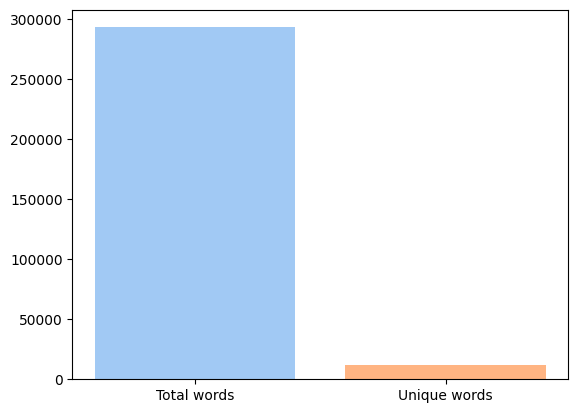

In [10]:
plt.bar(x = ["Total words", "Unique words"], 
        height=[len(cleaned_data.split()), len(set(cleaned_data.split()))], 
        color=sns.color_palette('pastel'))

In [11]:
print('Total Tokens: %d' % len(cleaned_data.split()))
print('Unique Tokens: %d' % len(set(cleaned_data.split())))

Total Tokens: 292883
Unique Tokens: 11923


In [12]:
sequences_doc = []
seq_len = 50
l = seq_len + 1
tokens = [w for w in cleaned_data.split()]

for i in range(l, len(tokens)):
    
    seq = tokens[i-l:i]

    line = ' '.join(seq)
    sequences_doc.append(line)

In [13]:
sequences_doc

['a game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint',
 'game of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint of',
 'of thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hint of a',
 'thrones book one of a song of ice and fire by george r r martin prologue we should start back gared urged as the woods began to grow dark around them the wildlings are dead do the dead frighten you ser waymar royce asked with just the hi

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sequences_doc)
sequences = tokenizer.texts_to_sequences(sequences_doc)

vocab_size = len(tokenizer.word_index) + 1

In [15]:
sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

seq_length = X.shape[1]

In [16]:
def define_model(vocab_size, seq_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 50, input_length=seq_length))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    return model

In [17]:
model = define_model(vocab_size, seq_length)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            596200    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 11924)             1204324   
                                                                 
Total params: 1951424 (7.44 MB)
Trainable params: 1951424 (7.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(X, y, batch_size=128, epochs=10)

Epoch 1/10


2288/2288 [==============================] - 386s 165ms/step - loss: 6.4875 - accuracy: 0.0685
Epoch 2/10
2288/2288 [==============================] - 318s 139ms/step - loss: 5.9637 - accuracy: 0.0966
Epoch 3/10
2288/2288 [==============================] - 317s 139ms/step - loss: 5.7230 - accuracy: 0.1100
Epoch 4/10
2288/2288 [==============================] - 318s 139ms/step - loss: 5.5423 - accuracy: 0.1181
Epoch 5/10
2288/2288 [==============================] - 315s 138ms/step - loss: 5.4028 - accuracy: 0.1241
Epoch 6/10
2288/2288 [==============================] - 317s 139ms/step - loss: 5.2849 - accuracy: 0.1289
Epoch 7/10
2288/2288 [==============================] - 315s 138ms/step - loss: 5.1909 - accuracy: 0.1321
Epoch 8/10
2288/2288 [==============================] - 320s 140ms/step - loss: 5.1011 - accuracy: 0.1353
Epoch 9/10
2288/2288 [==============================] - 458s 200ms/step - loss: 5.0338 - accuracy: 0.1382
Epoch 10/10
2288/2288 [=====================

In [22]:
import pickle
model.save('text_gen_model.h5')
# save the tokenizer
pickle.dump(tokenizer, open('tokenizer_text_gen.pkl', 'wb'))

c:\Users\Phoni\mini\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
    # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        yhat = np.argmax(yhat,axis=1)
        print(yhat)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

In [28]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)

she had she if i look back i am lost the price was paid dany said the horse my child quaro and qotho haggo and cohollo the price was paid and paid and paid she rose from her cushions where is khal drogo show him to me godswife maegi bloodmage whatever

[10]
[33]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[21]
[36]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[21]
[33]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[21]
[33]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[21]
[33]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]


'you have a man and the king said i will not be a man and the king said i will not have a man and the king said i will not have a man and the king said i will not have a man and the king said i will'

In [29]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)[:60]

the white woods by dead men and spiders big as hounds he was afraid for a moment until he remembered how that story ended the children will help him he blurted the children of the forest theon greyjoy sniggered and maester luwin said bran the children of the forest have been

[4]
[54]
[11]
[1]
[178]
[2]
[1]
[75]
[13]
[58]
[4]
[54]
[2]
[1]
[75]
[20]
[1]
[75]
[20]
[14]
[43]
[33]
[58]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[21]
[33]
[58]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[21]
[33]
[58]
[4]
[54]
[2]
[1]
[75]


'a man in the wall and the king had been a man and the king s'

In [33]:
seed_text = sequences_doc[np.random.randint(0,len(sequences_doc))]
print(seed_text + '\n')
generate_seq(model, tokenizer, seq_length, seed_text, 50)[:60]

up of men like his uncle if so yoren and his companions were a rude awakening tyrion felt sorry for the boy he had chosen a hard life or perhaps he should say that a hard life had been chosen for him he had rather less sympathy for the uncle benjen

[105]
[20]
[14]
[43]
[33]
[58]
[4]
[54]
[2]
[1]
[75]
[81]
[43]
[21]
[36]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[21]
[36]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[36]
[4]
[54]
[2]
[1]
[75]
[20]
[14]
[43]
[21]
[33]
[4]
[54]
[2]
[1]
[75]
[20]


'stark said i will have been a man and the king who will not '